In [71]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy import sparse
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from pandas import read_csv
from matplotlib.ticker import LogFormatter 
from sklearn.preprocessing import StandardScaler
from matplotlib.font_manager import FontProperties



In [72]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

# Standardize each column of the feature matrix
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

In [73]:
def FW(alpha, A, b, max_iter=100, tol=1e-8, callback=None):
    n_samples, n_features = A.shape
    x_t = sparse.dok_matrix((n_features, 1))  
    Atb = A.T.dot(b)

    for it in range(max_iter):
        Ax = x_t.T.dot(A.T).ravel()
        grad = (A.T.dot(Ax) - Atb)

        idx_oracle = np.argmax(np.abs(grad))
        mag_oracle = alpha * np.sign(-grad[idx_oracle])
        d_t = -x_t.copy()
        d_t[idx_oracle] += mag_oracle
        g_t = -d_t.T.dot(grad).ravel()

        if g_t <= tol:
            break

        q_t = A[:, idx_oracle] * mag_oracle - Ax
        step_size = min(q_t.dot(b - Ax) / q_t.dot(q_t), 1.)
        x_t += step_size * d_t

        if callback is not None:
            callback(g_t)

    return x_t

trace = []
def callback(g_t):
    trace.append(g_t)


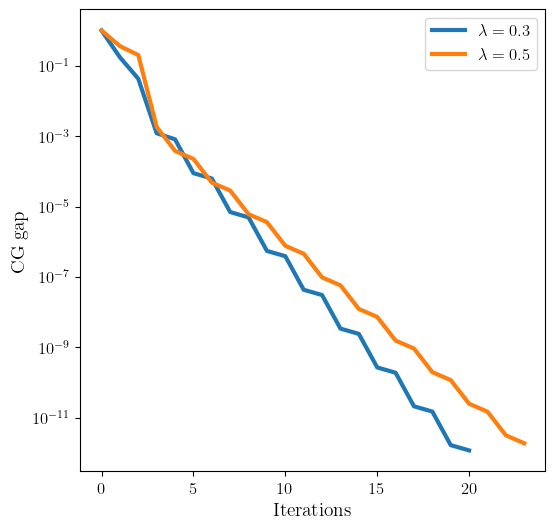

In [78]:
alpha_values = [0.3, 0.5]

# Plotting setup
plt.figure(figsize=(6, 6))
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
# Loop over different alpha values
for alpha in alpha_values:
    trace = []
    
    # Call the Frank-Wolfe algorithm with different alpha values
    alpha_housing = alpha * X_train.shape[1]
    sol_housing = FW(alpha_housing, X_train, y_train, callback=callback)
    
    # Plot the traces
    plt.plot(trace / trace[0], lw=3, label=f'$\lambda = {alpha}$')

plt.gca().yaxis.set_major_formatter(LogFormatter())
plt.yscale('log')
plt.xlabel(r'$\mathrm{Iterations}$', fontsize=14)
plt.ylabel(r'$\mathrm{CG\ gap}$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
legend_font = FontProperties(family='Helvetica', size=12)
# Apply these font properties to the legend
plt.legend(prop=legend_font)

plt.savefig('fw_lasso_housing_plot_different_lambda.pdf', dpi=400)

# Show the plot
plt.show()


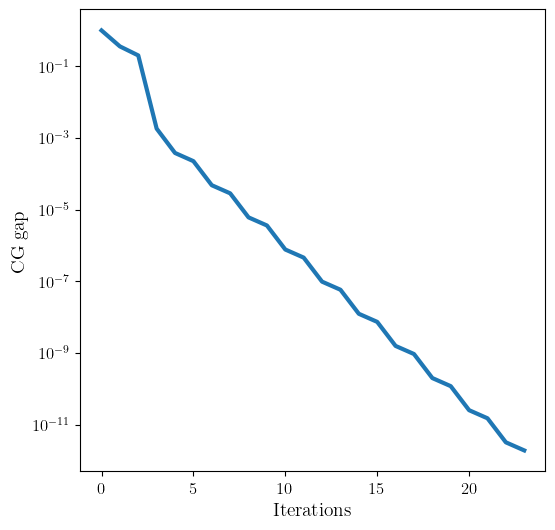

In [67]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
alpha_housing = 0.5 * X_train.shape[1]
sol_housing = FW(alpha_housing, X_train, y_train, callback=callback)
plt.figure(figsize=(6, 6))
plt.plot(trace / trace[0], lw=3)
plt.gca().yaxis.set_major_formatter(LogFormatter())
plt.yscale('log')
plt.xlabel(r'$\mathrm{Iterations}$', fontsize=14)
plt.ylabel(r'$\mathrm{CG\ gap}$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.savefig('fw_lasso_housing_plot.pdf', dpi=400)
plt.show()


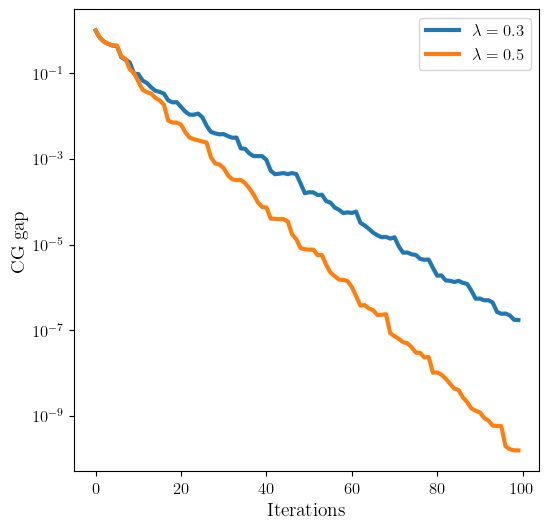

In [79]:
n_samples, n_features = 5000, 5000
A, b = datasets.make_regression(n_samples, n_features)

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

alpha_values = [0.3, 0.5]


# Plotting setup
plt.figure(figsize=(6, 6))
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
# Loop over different alpha values
for alpha in alpha_values:
    trace = []
    
    # Call the Frank-Wolfe algorithm with different alpha values
    alpha_housing = alpha * A_train.shape[1]
    sol_housing = FW(alpha_housing, A_train, b_train, callback=callback)
    
    # Plot the traces
    plt.plot(trace / trace[0], lw=3, label=f'$\lambda = {alpha}$')

plt.gca().yaxis.set_major_formatter(LogFormatter())
plt.yscale('log')
plt.xlabel(r'$\mathrm{Iterations}$', fontsize=14)
plt.ylabel(r'$\mathrm{CG\ gap}$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
legend_font = FontProperties(family='Helvetica', size=12)
# Apply these font properties to the legend
plt.legend(prop=legend_font)

plt.savefig('fw_lasso_random_plot_different_lambda.pdf', dpi=400)

# Show the plot
plt.show()


In [ ]:


trace_rand = []
def callback(g_t):
    trace_rand.append(g_t)
alpha_rand = 0.5 * A_train.shape[1]
sol_rand = FW(alpha_rand, A_train, b_train, callback=callback)


plt.figure(figsize=(6, 6))
plt.plot(trace_rand / trace_rand[0], lw=3)
plt.gca().yaxis.set_major_formatter(LogFormatter())
plt.yscale('log')
plt.xlabel(r'$\mathrm{Iterations}$', fontsize=14)
plt.ylabel(r'$\mathrm{CG\ gap}$', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)
plt.savefig('fw_lasso_plot.pdf', dpi=400)
plt.show()